## Time Series regression - 1D Convolutional Neural Networks (Conv1D)

In [1]:
# DAL ToolBox
# version 1.10.727

source("https://raw.githubusercontent.com/cefet-rj-dal/daltoolbox/main/jupyter.R")

#loading DAL
load_library("daltoolbox")

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform




### Series for studying

In [2]:
data(sin_data)
ts <- ts_data(sin_data$y, 10)
ts_head(ts, 3)

t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
0.0000000,0.2474040,0.4794255,0.6816388,0.8414710,0.9489846,0.9974950,0.9839859,0.9092974,0.7780732
0.2474040,0.4794255,0.6816388,0.8414710,0.9489846,0.9974950,0.9839859,0.9092974,0.7780732,0.5984721
0.4794255,0.6816388,0.8414710,0.9489846,0.9974950,0.9839859,0.9092974,0.7780732,0.5984721,0.3816610


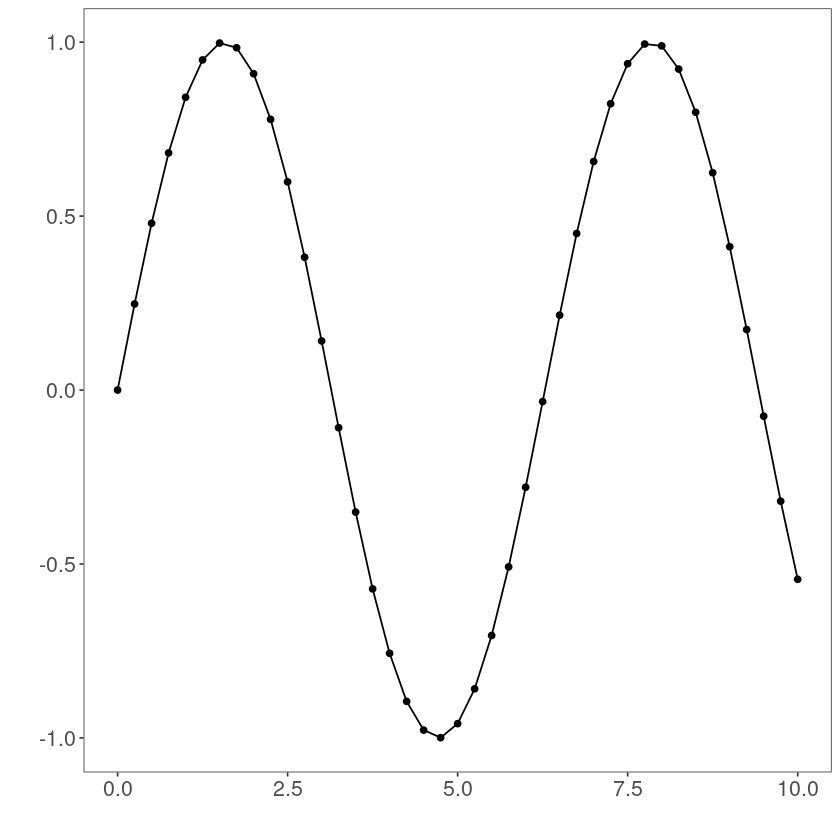

In [3]:
library(ggplot2)
plot_ts(x=sin_data$x, y=sin_data$y) + theme(text = element_text(size=16))

### data sampling

In [4]:
samp <- ts_sample(ts, test_size = 5)
io_train <- ts_projection(samp$train)
io_test <- ts_projection(samp$test)

### Model training

In [5]:
model <- ts_conv1d(ts_norm_gminmax(), input_size=4, epochs=10000)
model <- fit(model, x=io_train$input, y=io_train$output)

### Evaluation of adjustment

In [6]:
adjust <- predict(model, io_train$input)
adjust <- as.vector(adjust)
output <- as.vector(io_train$output)
ev_adjust <- evaluate(model, output, adjust)
ev_adjust$mse

[1] 0.0001037313

### Prediction of test

In [7]:
prediction <- predict(model, x=io_test$input[1,], steps_ahead=5)
prediction <- as.vector(prediction)
output <- as.vector(io_test$output)
ev_test <- evaluate(model, output, prediction)
ev_test

mse,smape,R2
<dbl>,<dbl>,<dbl>
3.847795e-05,0.03267266,0.9996677


### Plot results

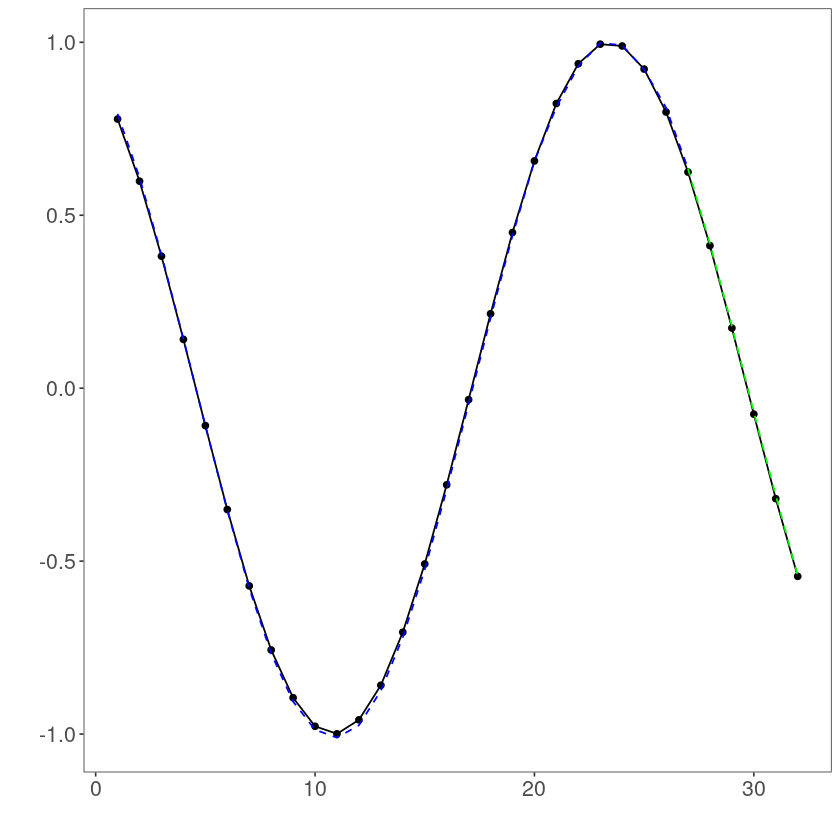

In [8]:
yvalues <- c(io_train$output, io_test$output)
plot_ts_pred(y=yvalues, yadj=adjust, ypre=prediction) + theme(text = element_text(size=16))